In [1]:
#Import libraries
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

ModuleNotFoundError: No module named 'empiricaldist'

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.shape

(344, 17)

In [4]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.shape

(344, 8)

In [5]:
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
preprocess_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [7]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


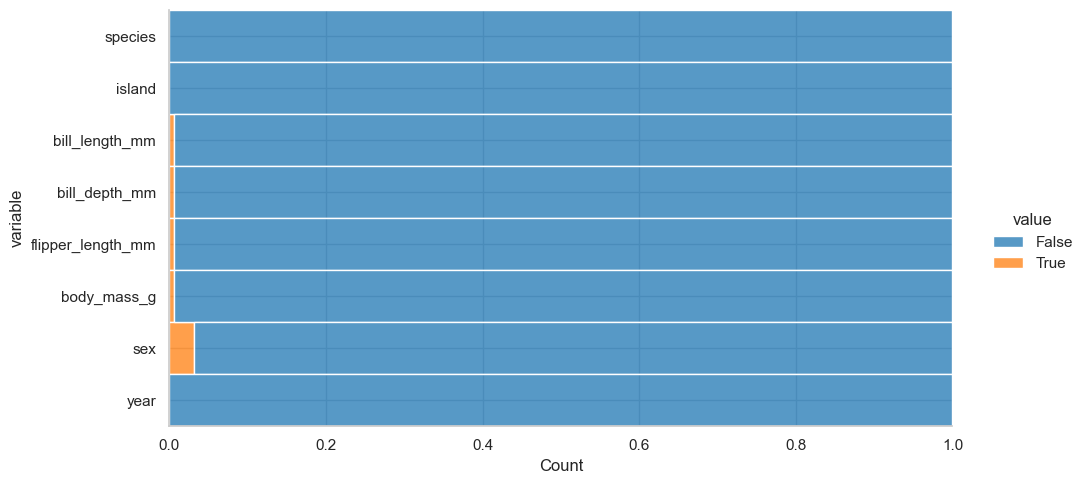

In [8]:
#Cuál es la proporción de valores nulos por cada variable?
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

In [9]:
preprocess_penguins_df.isnull()
 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


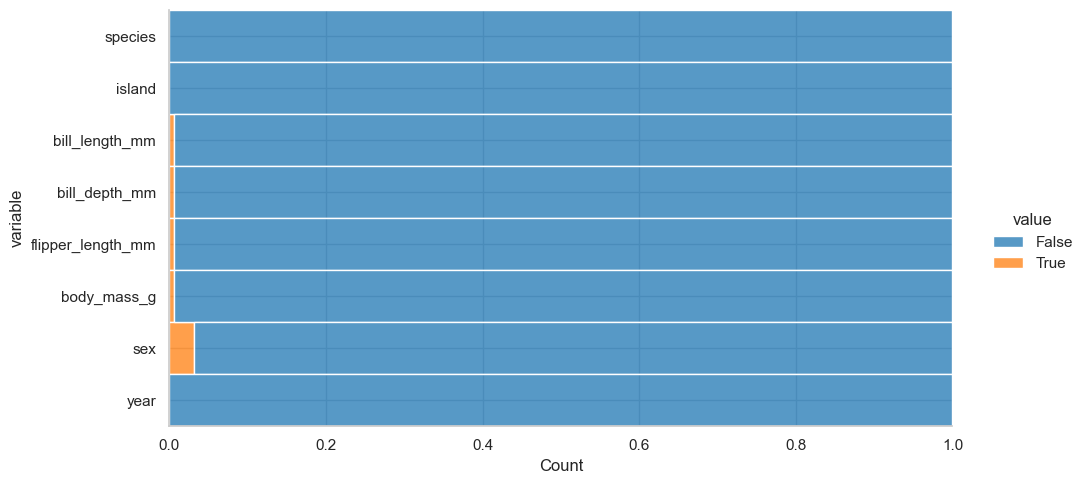

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

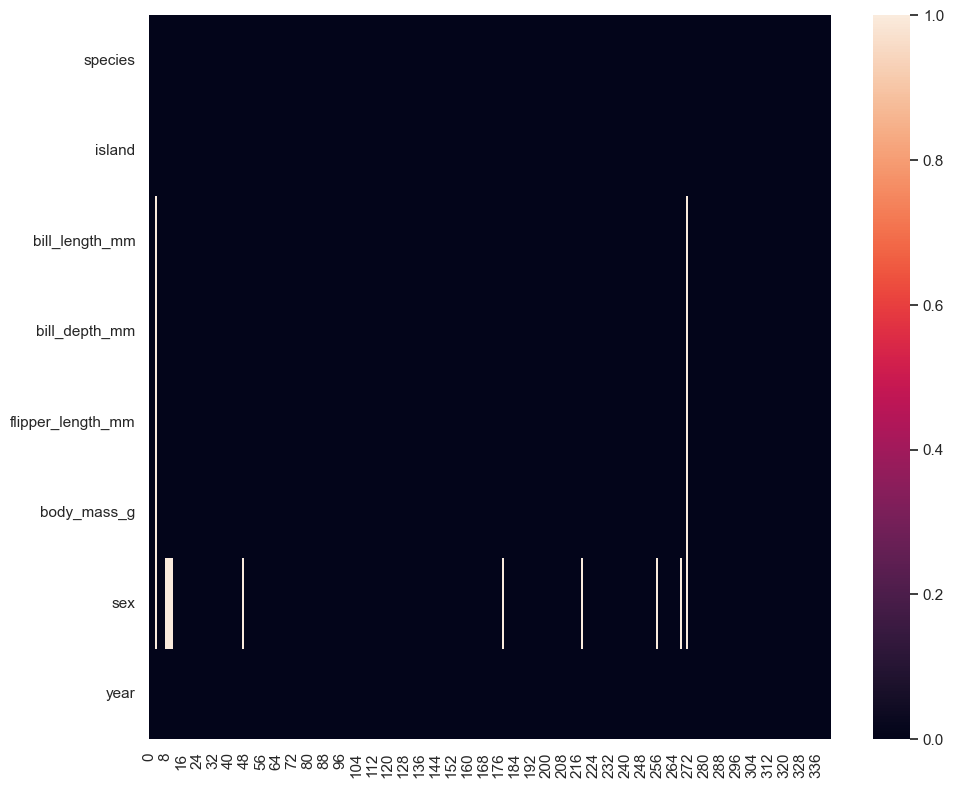

In [11]:
preprocess_penguins_df.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(
            data=df
        )
    )
)

In [12]:
processed_penguins_df = preprocess_penguins_df.dropna()
processed_penguins_df.shape

(333, 8)

In [13]:
preprocess_penguins_df.shape

(344, 8)

In [14]:
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [15]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [16]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


<Axes: xlabel='species'>

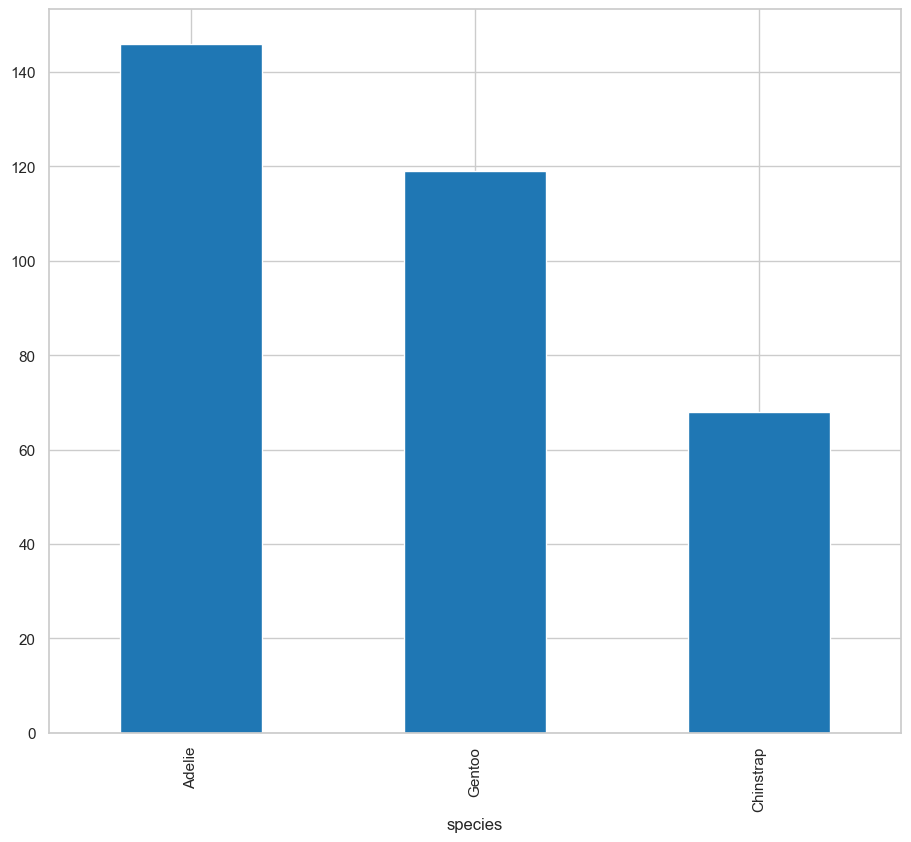

In [17]:
(
processed_penguins_df
.species
.value_counts()
.plot(
    kind='bar'
))

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


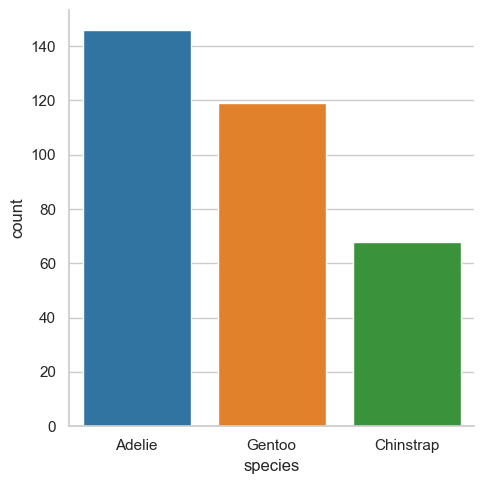

In [18]:
(
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count'
))

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

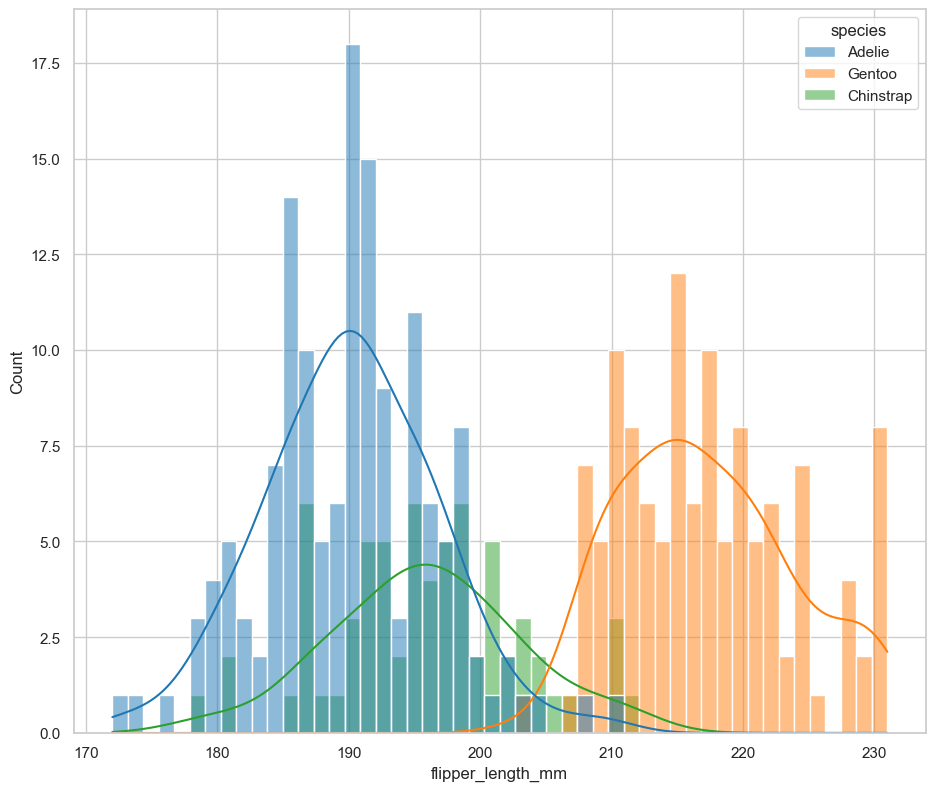

In [19]:
#bill_length_mm        True
#bill_depth_mm         True
#flipper_length_mm     True
(sns.histplot(
    data=processed_penguins_df,
    kde=True,
    x='flipper_length_mm',
    bins=50,
    hue='species',
    alpha=0.5
))

<Axes: xlabel='species', ylabel='flipper_length_mm'>

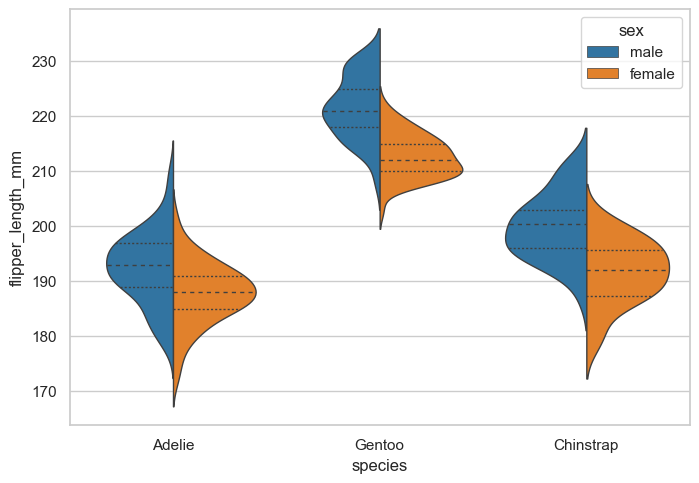

In [20]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8, 5.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

sns.violinplot(
    data=processed_penguins_df,
    x='species', 
    y='flipper_length_mm',
    linewidth=1,
    inner='quart',
    hue='sex',
    split=True
)

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


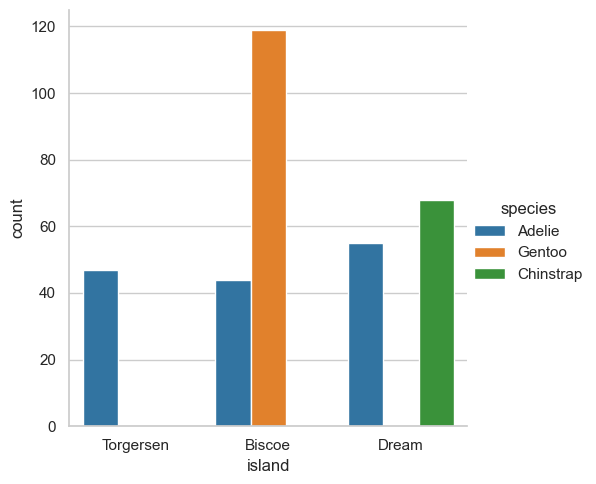

In [21]:
#Cantidad de ejemplares por especie en cada isla barplot
processed_penguins_df.count()
sns.catplot(
    data=processed_penguins_df,
    kind='count',
    x='island',
    hue='species'
)

## Distribuciones PMFs, CDFs y PDFs

### Funciones de probabilidad de masas (PMFs)

Utilizando Seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

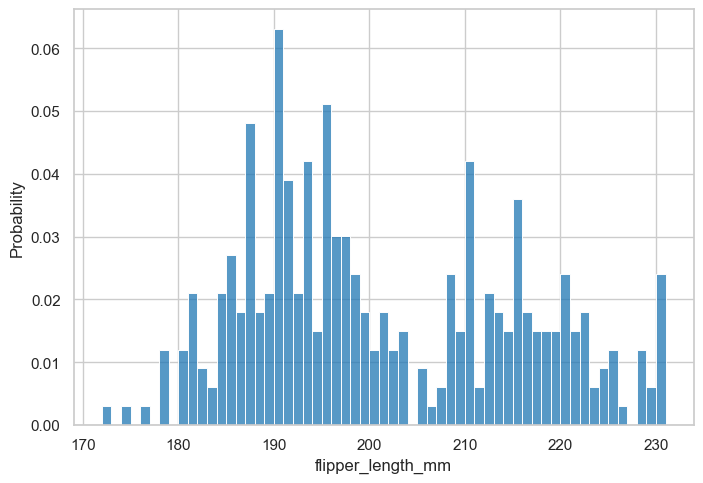

In [22]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

Utilizando empiricaldist

In [23]:
pmf_flipper_lenght_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

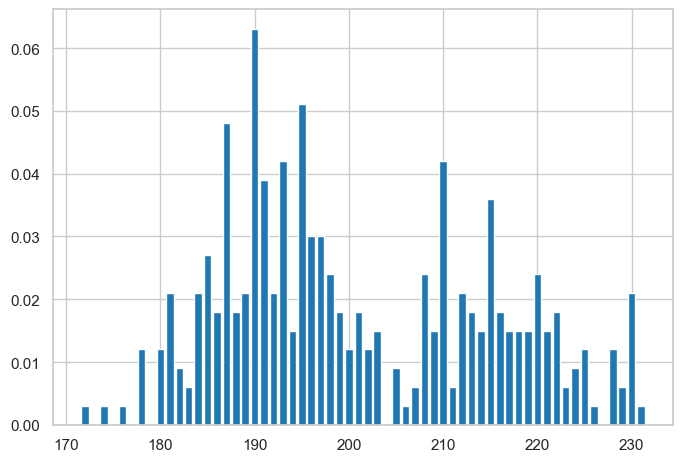

In [24]:
pmf_flipper_lenght_mm.bar()

In [25]:
pmf_flipper_lenght_mm(190)

0.06306306306306306

In [26]:
processed_penguins_df.flipper_length_mm.max()

231.0

### Función empírica de probabilidad acumulada (ECDFs)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

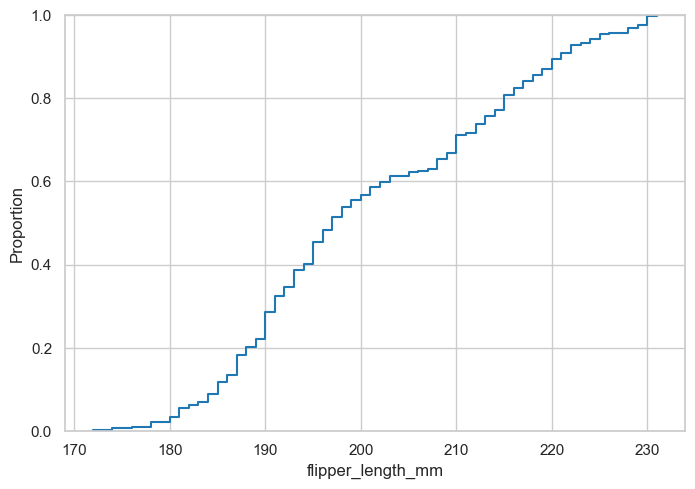

In [27]:
#Usando seabron
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

In [28]:
#USANDO EMPIRICALDEST Puedes llegar a un mayor detalle
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize = True
)

<Axes: xlabel='flipper_length_mm'>

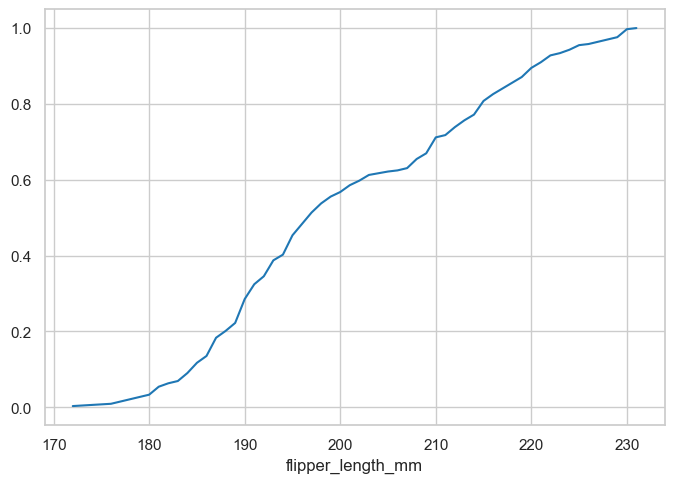

In [29]:
cdf_flipper_length_mm.plot()

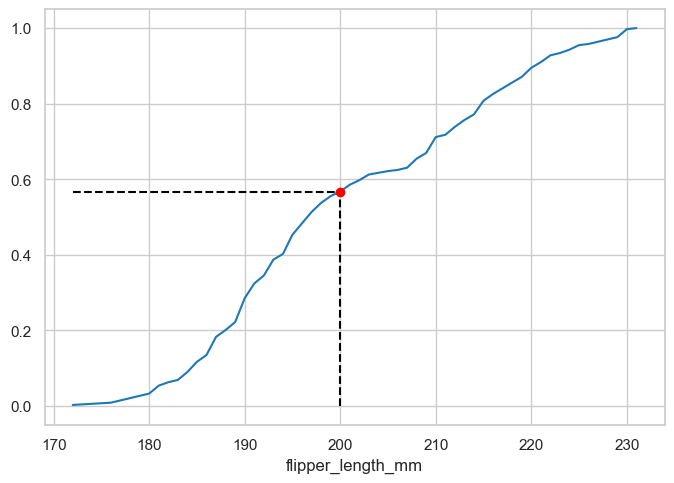

In [30]:
p = cdf_flipper_length_mm.forward(200)

cdf_flipper_length_mm.plot()
plt.vlines(
    x=200,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_lenght_mm.qs[0],
    xmax=200,
    color='black',
    linestyles='dashed'
)

plt.plot(200,p,'ro')

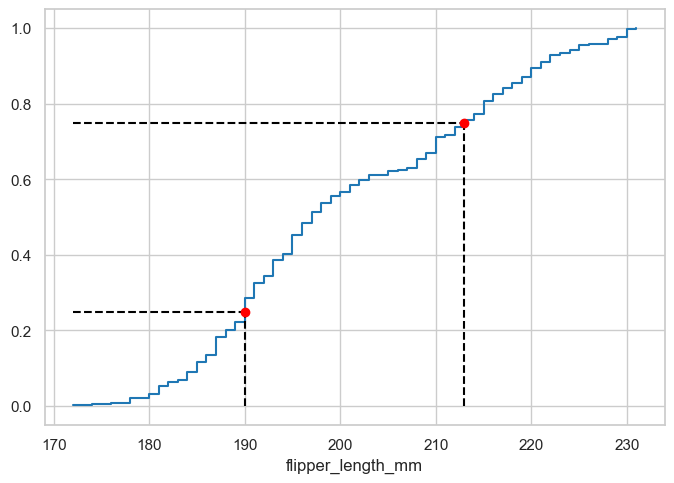

In [31]:
cdf_flipper_length_mm.step()

p_1 = 0.25
p_2 = 0.75

ps=(0.25,0.75) #IQR
qs=cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_lenght_mm.qs[0],
    xmax=qs,
    color='black',
    linestyles='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

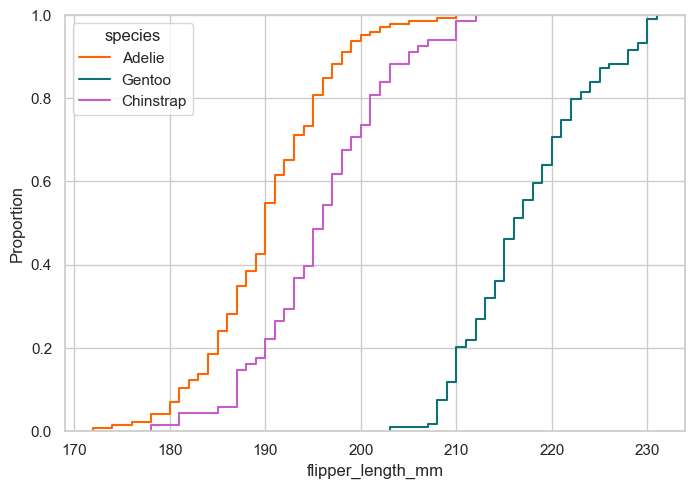

In [32]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Funciones de densidad de probabilidad
- Variables continuas

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

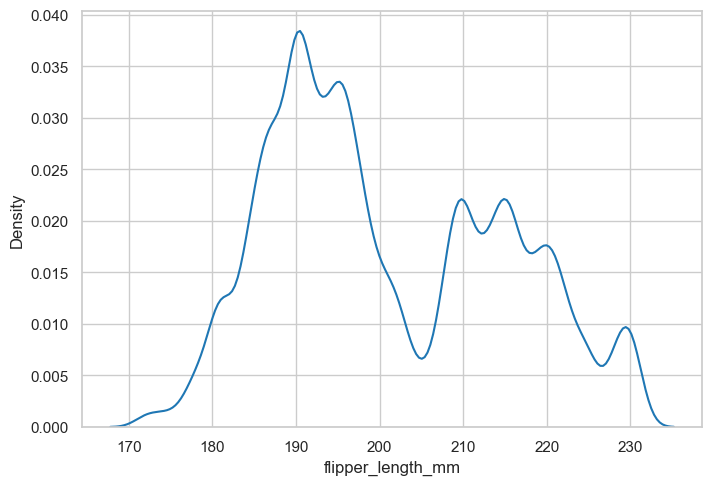

In [33]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [34]:
stats=processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

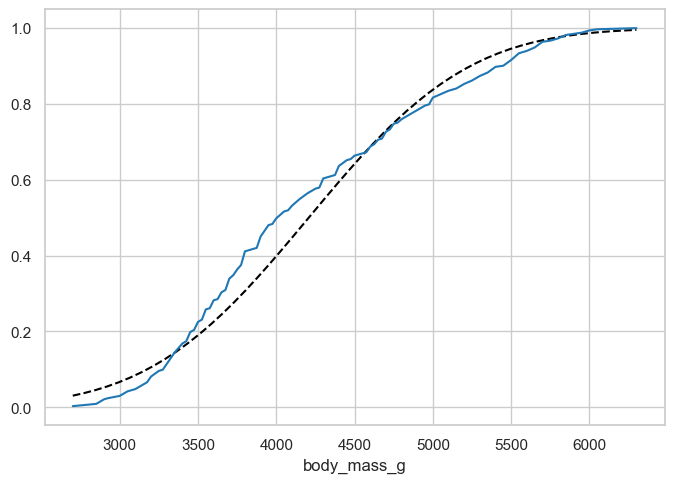

In [35]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

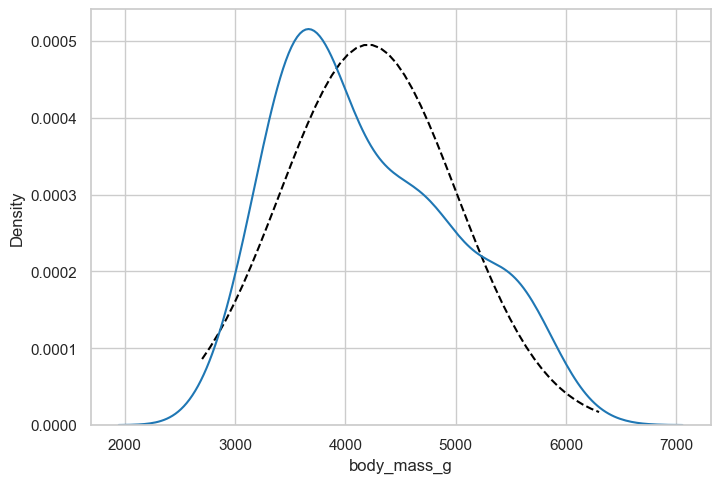

In [36]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

#Nuestros datos no siguen una distribución normal, es sesgada a la derecha. 

In [37]:
# Filtros

adelie_df = processed_penguins_df.query("species == 'Adelie'")
gentoo_df = processed_penguins_df.query("species == 'Gentoo'")
chinstrap_df = processed_penguins_df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = processed_penguins_df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('year')


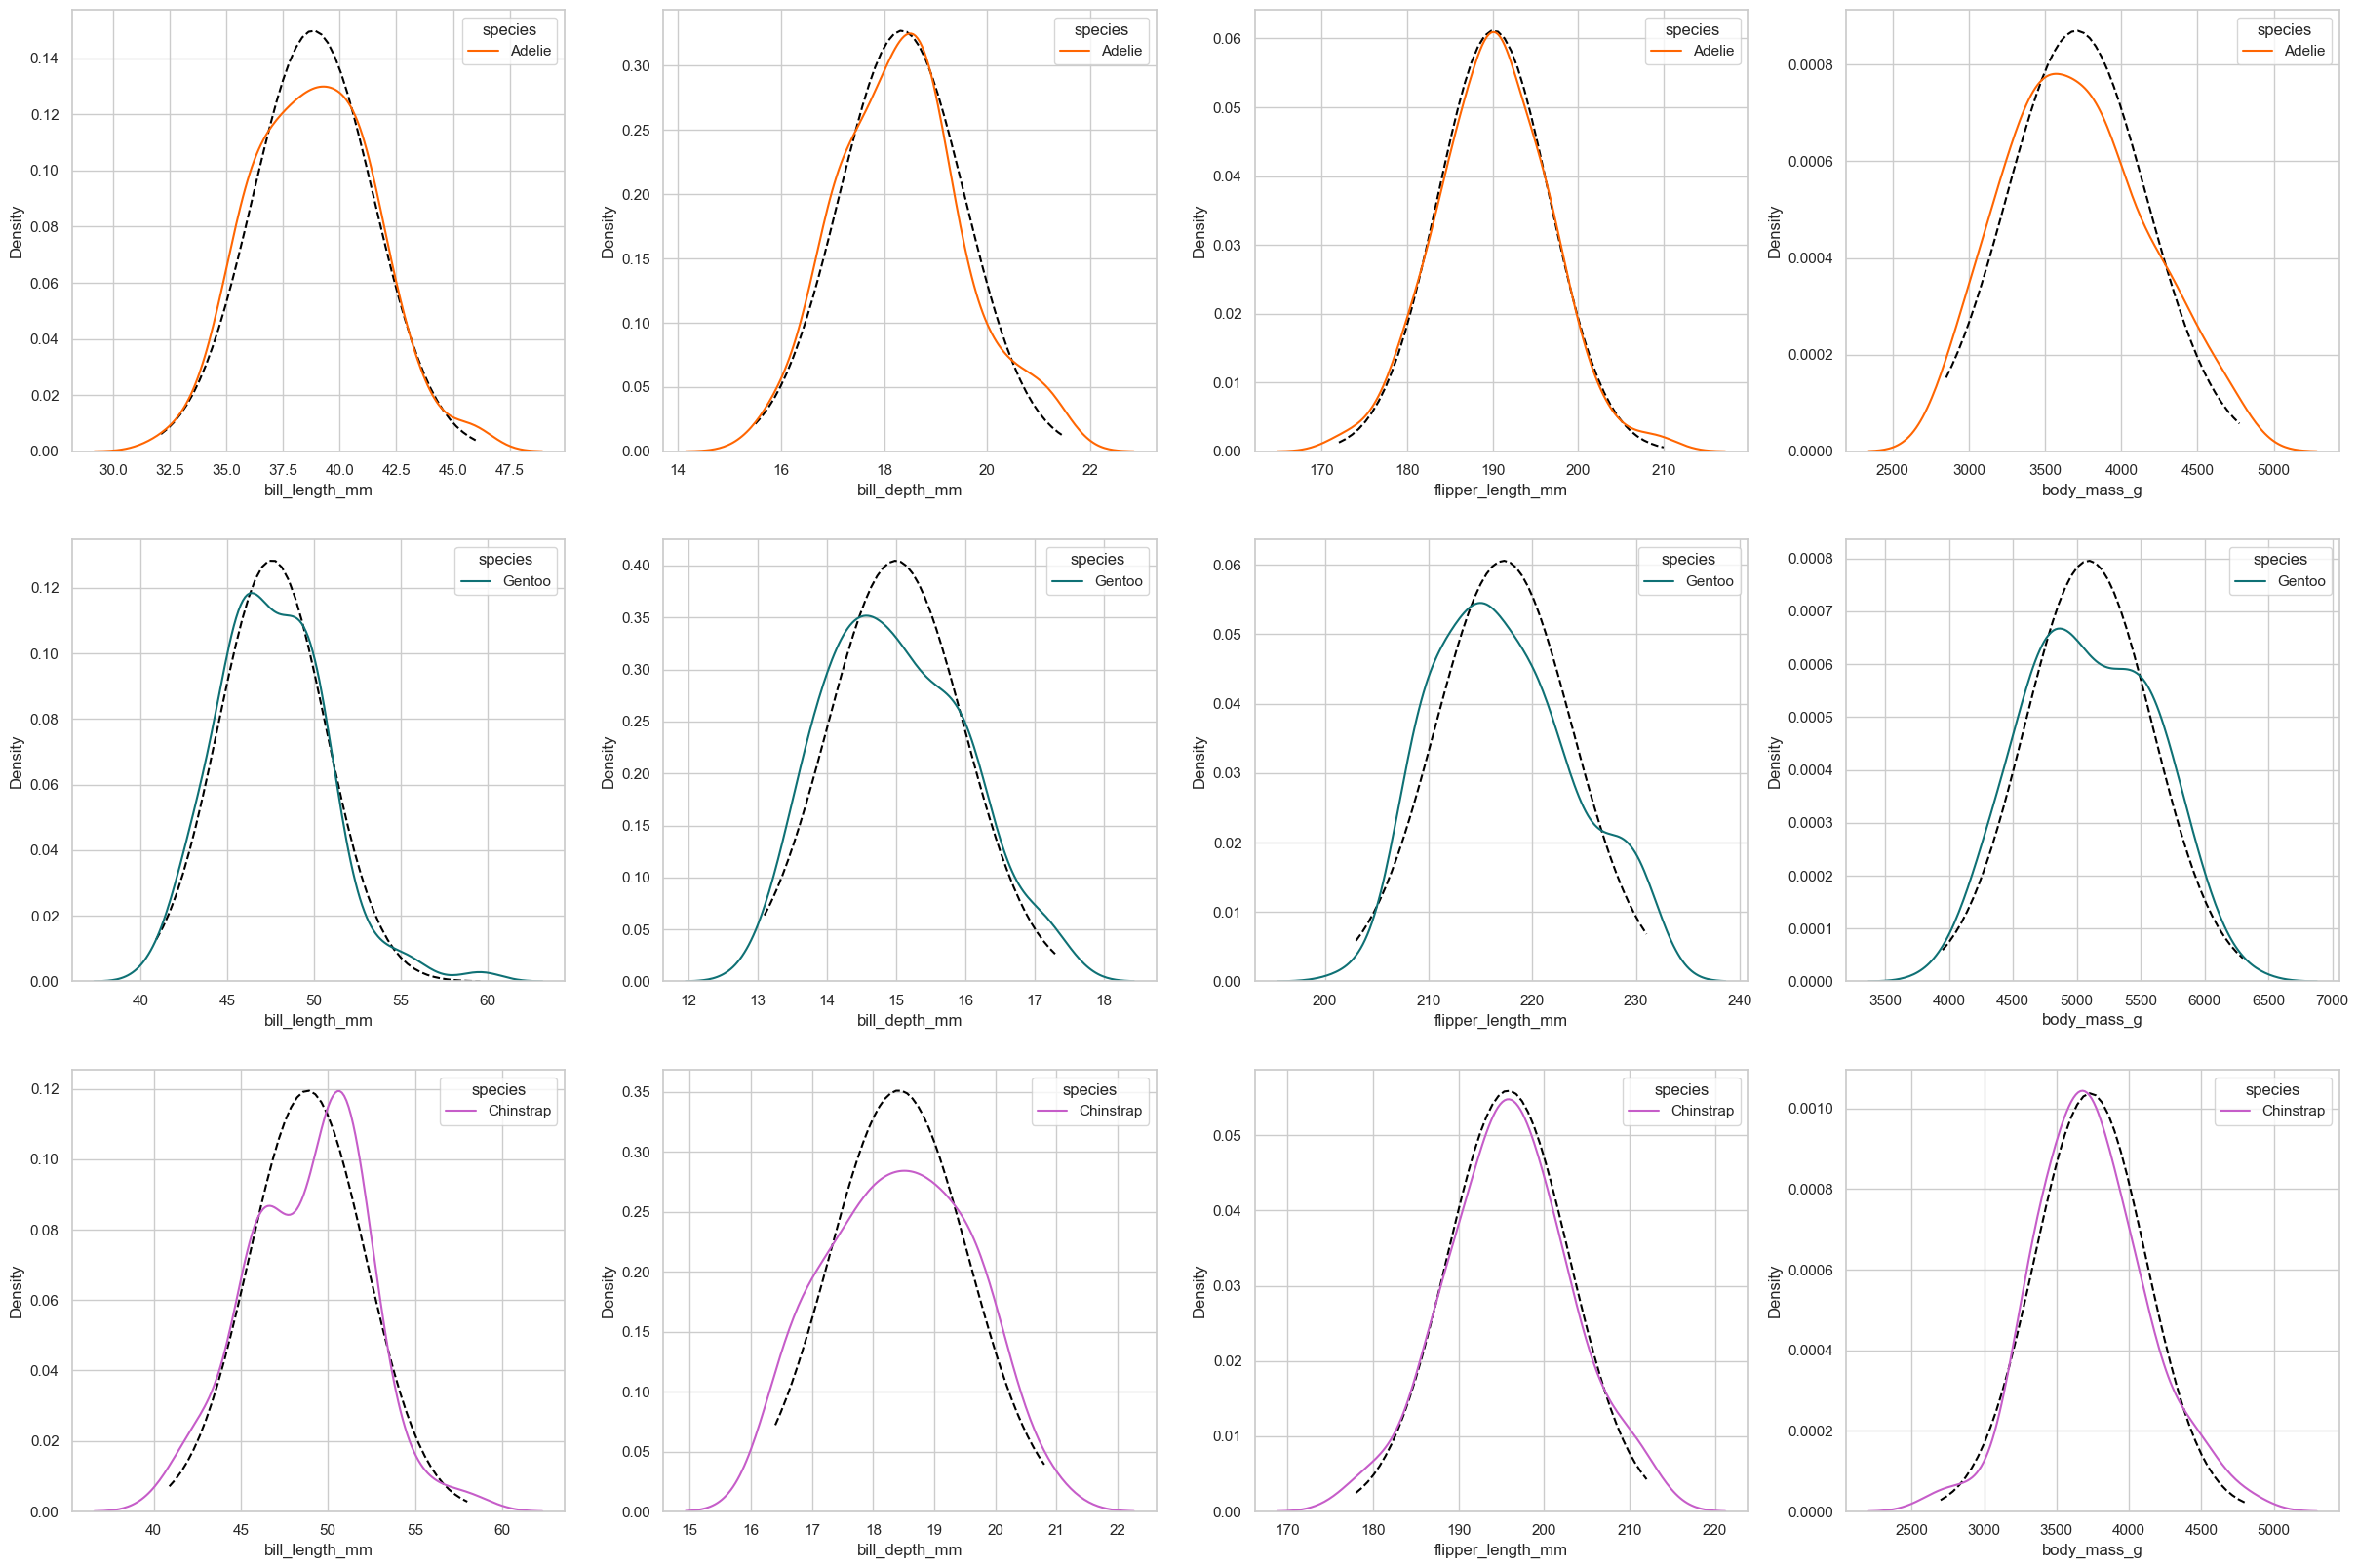

In [38]:
# Grafica


fig, ax = plt.subplots(3,4, figsize=(30,20))
for i, i_col in enumerate(specie):
    for j, j_col in enumerate(numeric_columns):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'], stats['max'])
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs, ys, color='black', linestyle='--')

        sns.kdeplot(
            ax= ax[i][j],
            data=i_col,
            x=j_col,
            hue='species',
            palette=penguin_color
        )

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

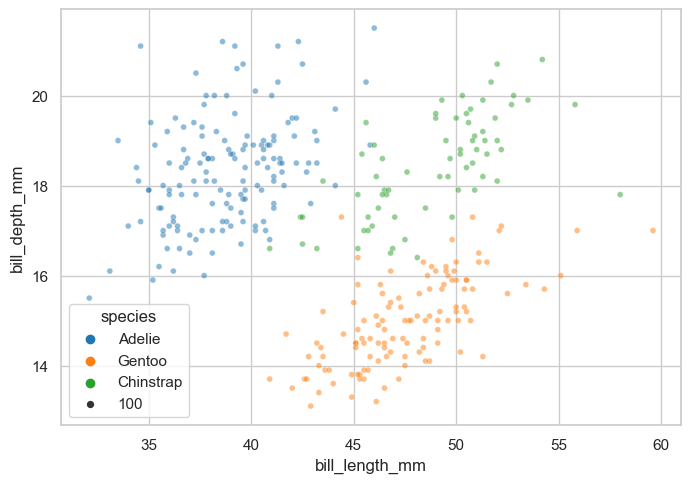

In [39]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    size=100,
    alpha=1/2,
    hue='species'
)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

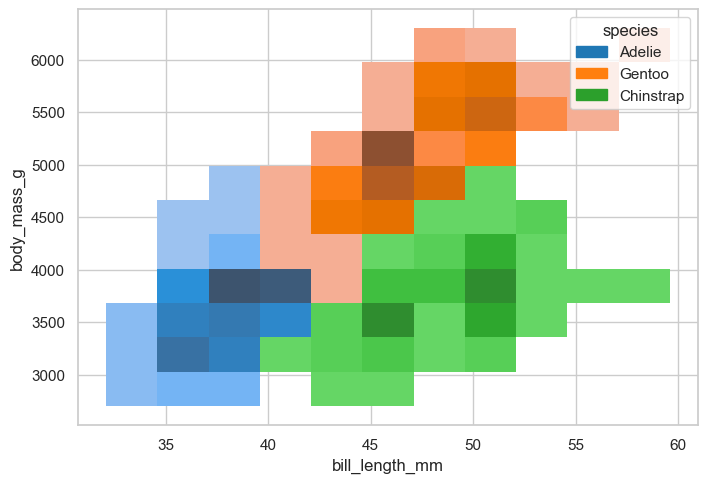

In [40]:
sns.histplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species'
)

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


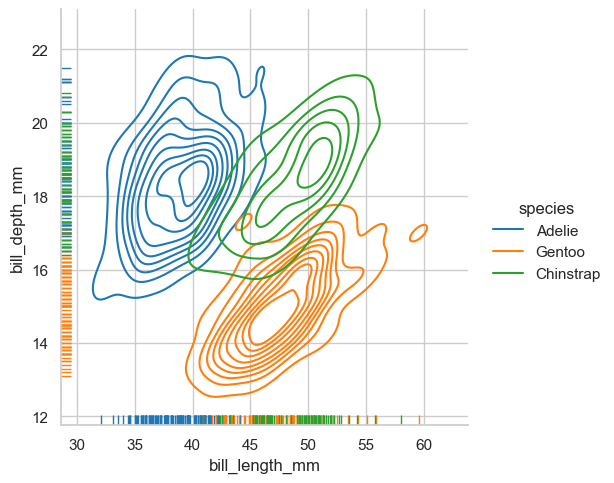

In [41]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

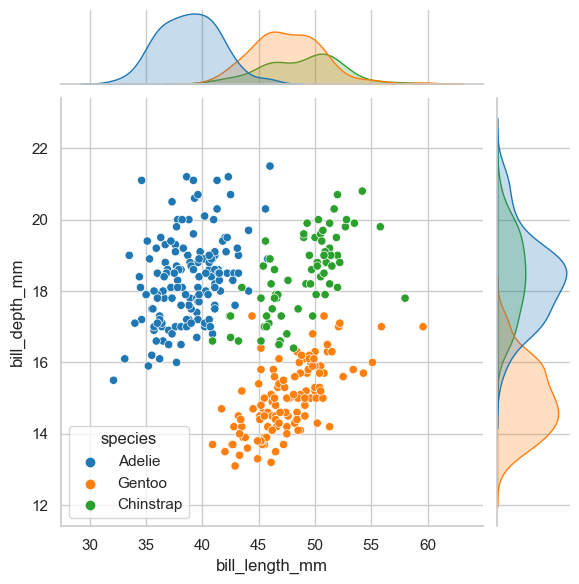

In [42]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

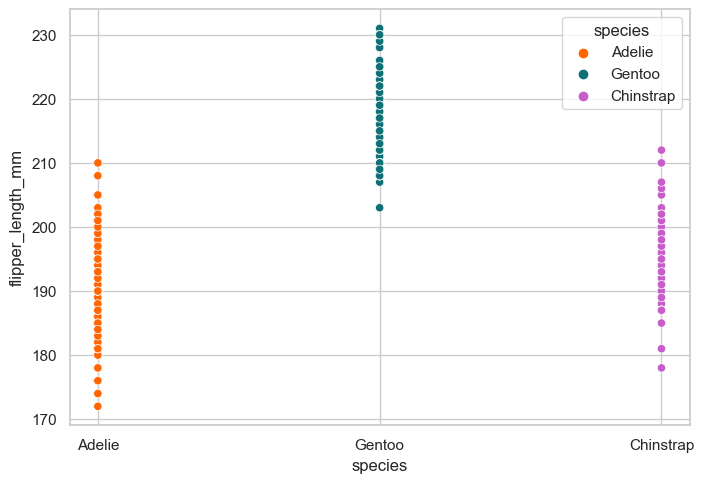

In [43]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

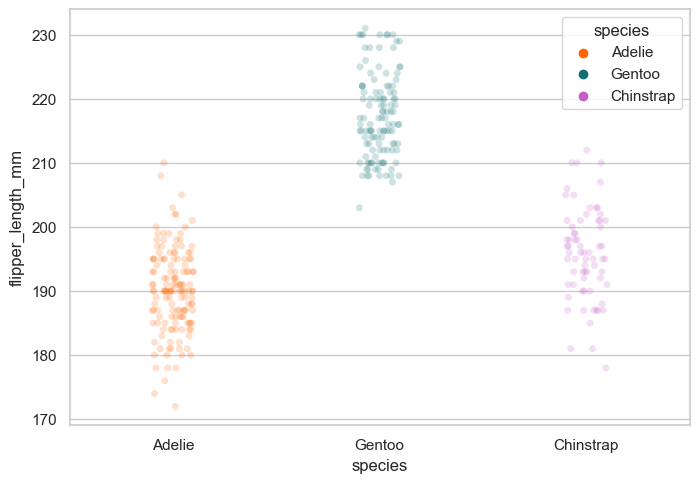

In [44]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color,
    alpha=1/5
)

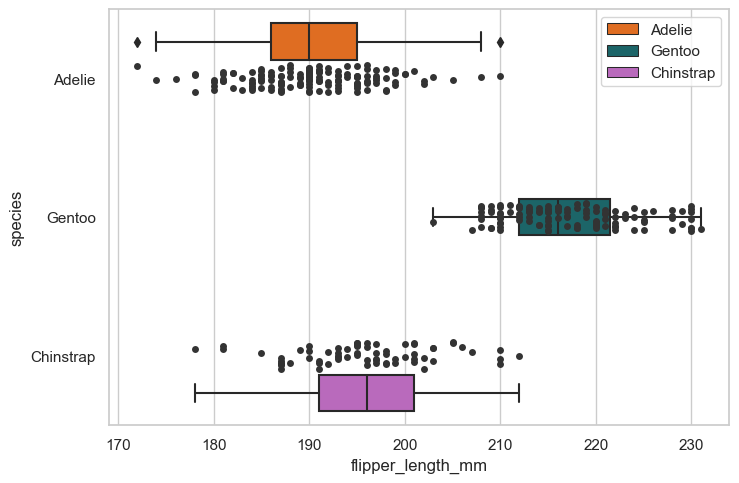

In [45]:
ax = sns.boxplot(
    data=processed_penguins_df,
    y='species',
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    y='species',
    x='flipper_length_mm',
    color='.2'
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

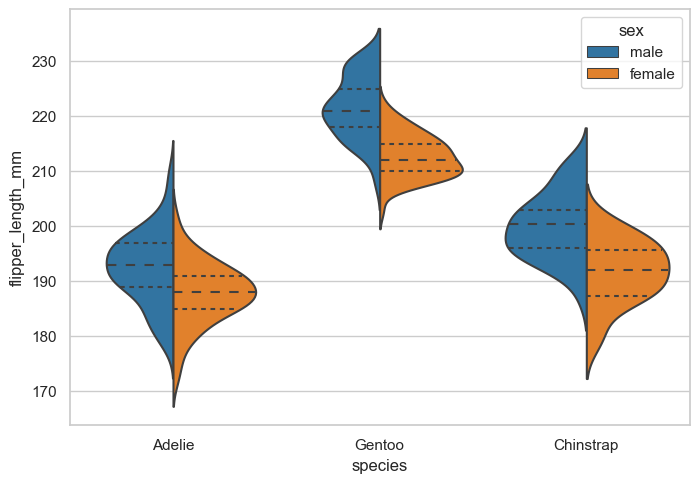

In [46]:
sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    inner='quart',
    hue='sex',
    split=True,

)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca79f35d-8521-4367-9644-c393b72771da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

<Axes: xlabel='species', ylabel='flipper_length_mm'>

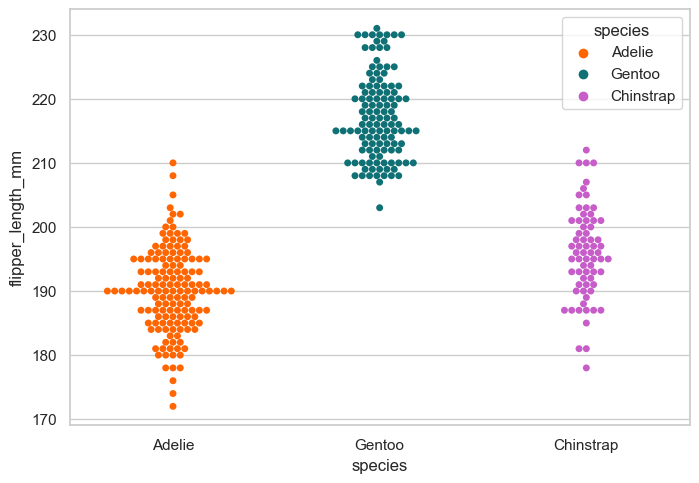

In [47]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Matrices de Correlación

<Axes: >

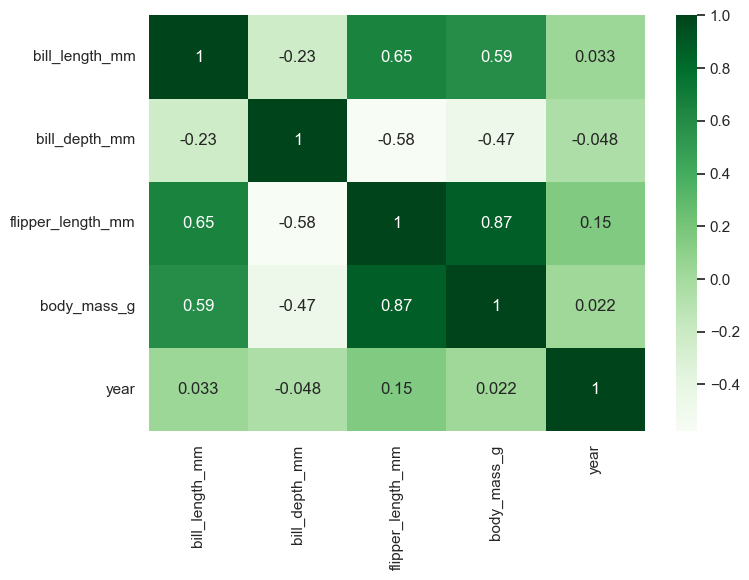

In [48]:
corr = processed_penguins_df.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm')

sns.heatmap(corr, cmap="Greens",annot=True)


d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage
d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage


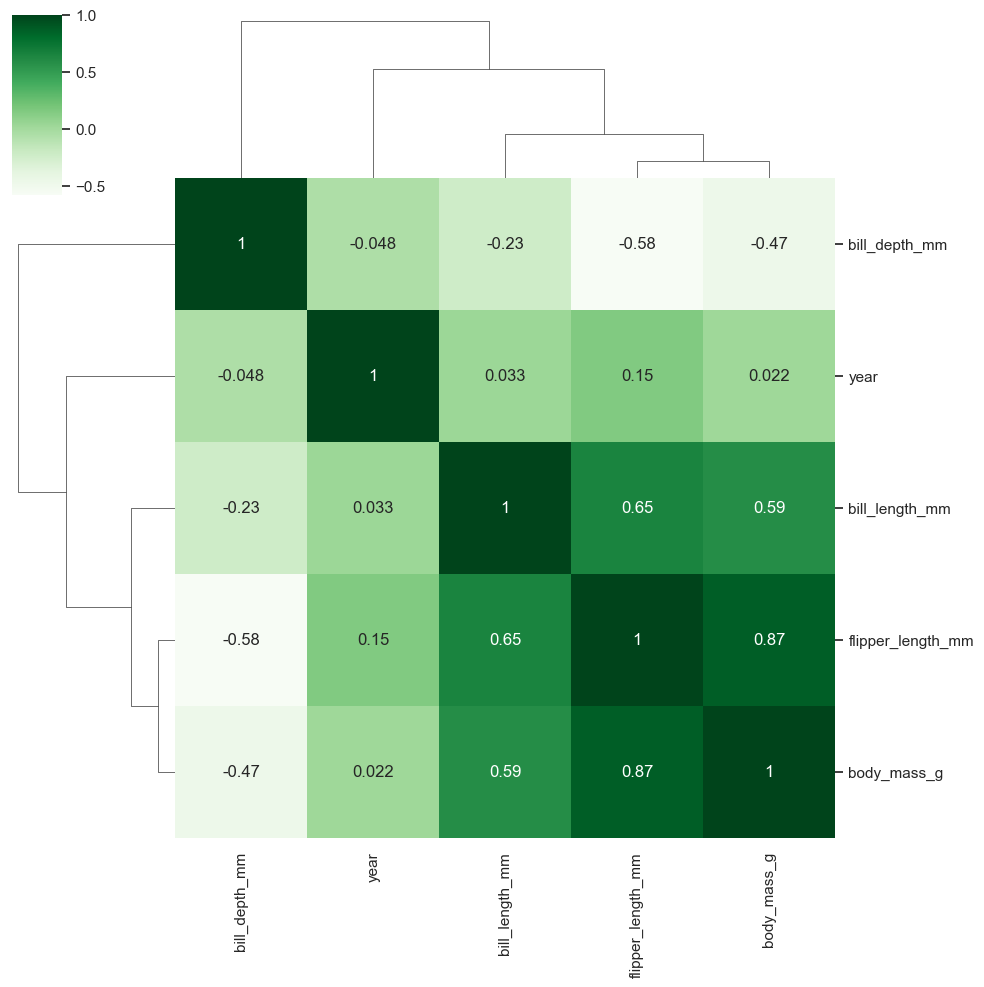

In [49]:
corr = processed_penguins_df.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm')

sns.clustermap(corr, cmap="Greens",annot=True)


¿Cómo podría representar una variable categórica como numérica discreta?

In [50]:
#Transformando sexo a 0s y 1s
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'], [0,1])
    )
)

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage
d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage


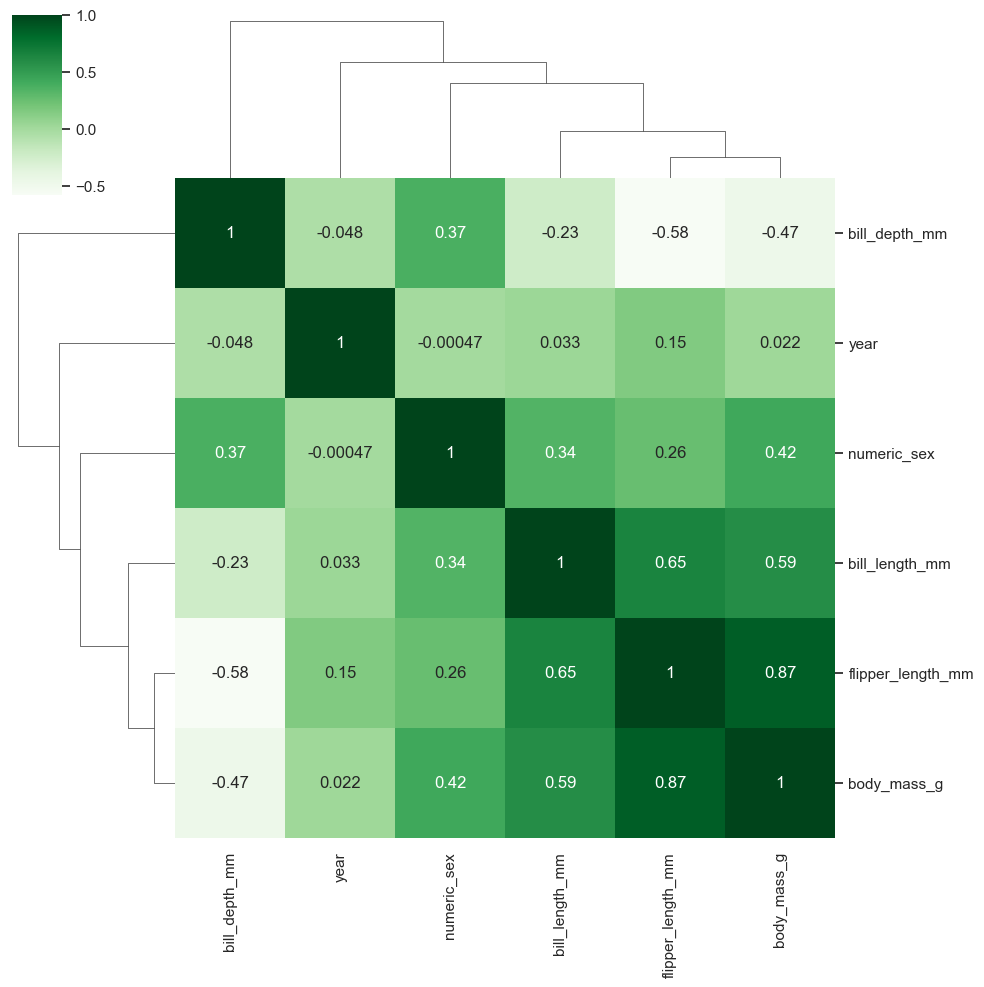

In [51]:
corr = processed_penguins_df.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm')

sns.clustermap(corr, cmap="Greens",annot=True)


LIMITANTES DE LOS COEFICIENTES DE CORRELACIÓN LINEAL
Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[ 1.        , -0.04460095],
       [-0.04460095,  1.        ]])

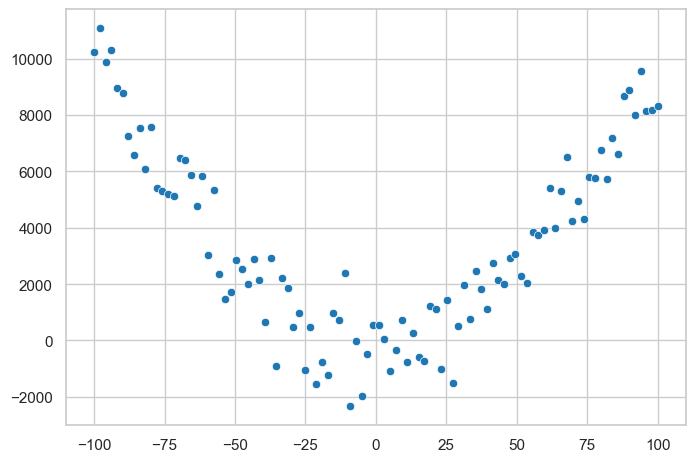

In [52]:
x = np.linspace(-100,100, 100)
y = x**2
y += np.random.normal(0,1000, x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x, y)

array([[1.        , 0.91662849],
       [0.91662849, 1.        ]])

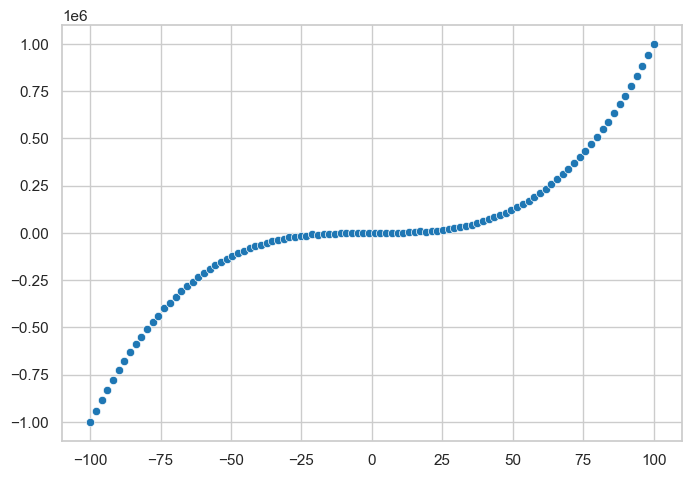

In [53]:
x = np.linspace(-100,100, 100)
y = x**3
y += np.random.normal(0,1000, x.size)

sns.scatterplot(
    x=x,
    y=y
)

np.corrcoef(x, y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

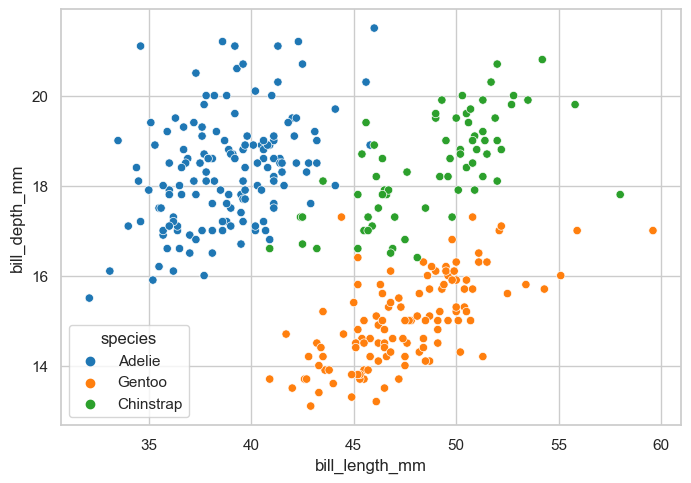

In [54]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

El coeficiente de correlación no nos habla del impacto de la relación

Estableciendo relaciones: Análisis de regresión simple

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


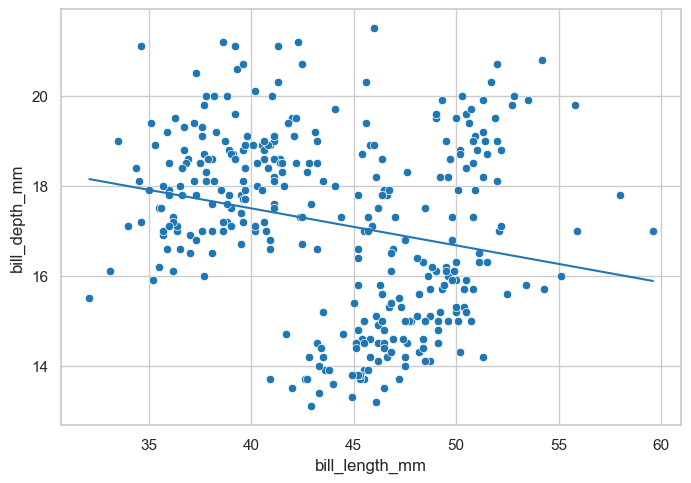

In [55]:
sns.scatterplot(
    data=processed_penguins_df,
    y='bill_depth_mm',
    x='bill_length_mm'
)
res_1 = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)

print(res_1)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

plt.plot(fx_1, fy_1)

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


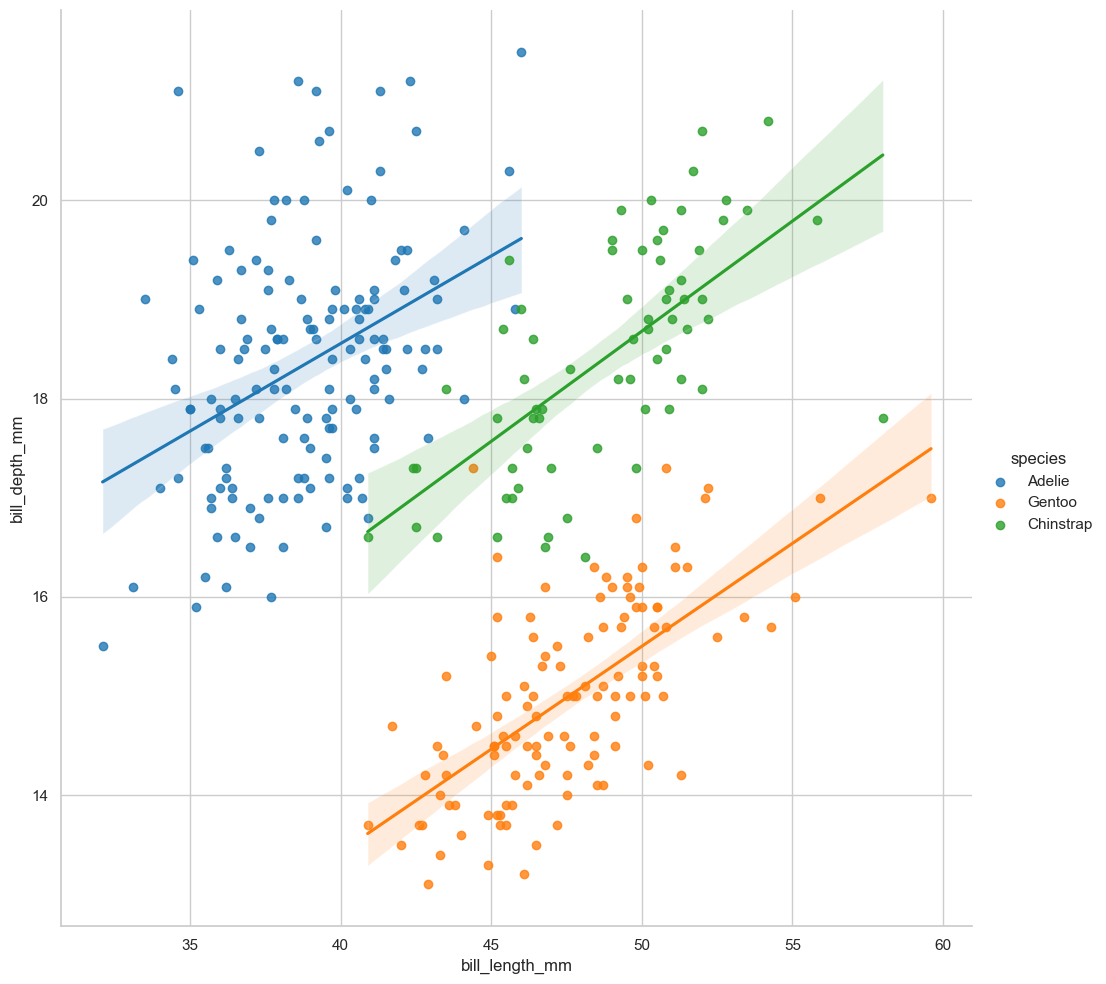

In [56]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)

Limitaciones del análisis de regresión lineal simple
- La regresión lineal simple de A - B no es lo mismo que la de B - A
- Solo puede manejar relaciones lineales.

# La regresión lineal simple no es simétrica

In [57]:
x= processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


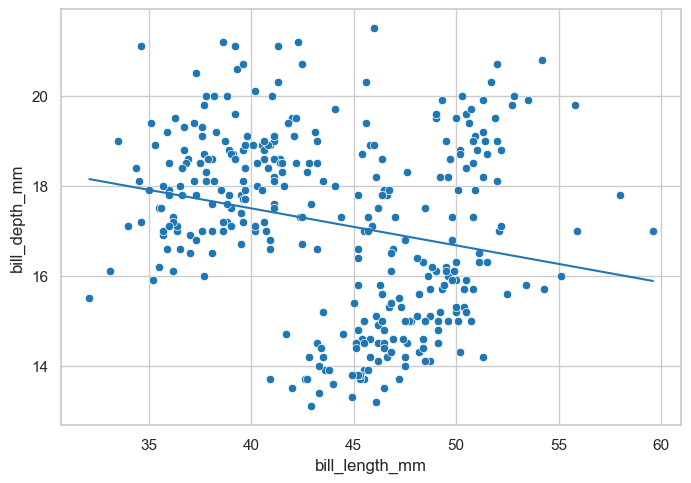

In [58]:
sns.scatterplot(
    data=processed_penguins_df,
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope*fx_1

plt.plot(fx_1,fy_1)

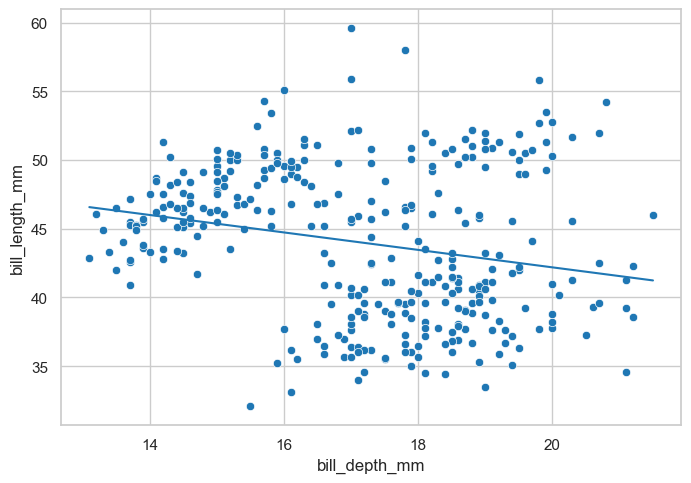

In [59]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

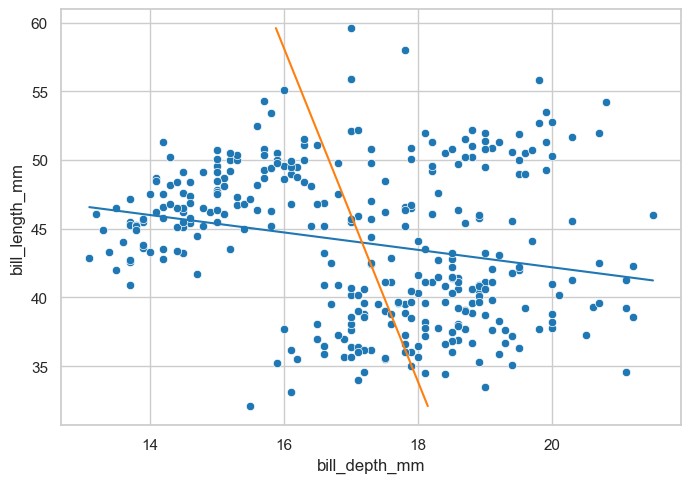

In [60]:
sns.scatterplot(
    x=y,
    y=x
)

plt.plot(fx_2, fy_2)
plt.plot(fy_1,fx_1)

La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [61]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm' ,
        data=processed_penguins_df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

Análisis de Regresión Múltiple

In [62]:
model_1 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm',
        data = processed_penguins_df
    )
    .fit()
)

model_1.summary()

d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:106

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.54e-32
Time:                        18:06:08   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model_2 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
        data = processed_penguins_df
    )
    .fit()
)

model_2.summary()

d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:106

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           7.04e-46
Time:                        18:06:08   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model_3 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = processed_penguins_df
    )
    .fit()
)

model_3.summary()

d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:106

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          9.26e-103
Time:                        18:06:08   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model_4 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data = processed_penguins_df
    )
    .fit()
)

model_4.summary()

d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:106

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          6.28e-122
Time:                        18:06:08   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model_5 = (
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm + C(sex)',
        data = processed_penguins_df
    )
    .fit()
)

model_5.summary()

d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
d:\iVisa\Platzi\venv\Lib\site-packages\scipy\stats\_stats_py.py:106

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          3.53e-118
Time:                        18:06:08   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualizando Resultados

In [67]:
#Tabla de resultados
models_results = pd.DataFrame(
    dict(
        actual_value = processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = processed_penguins_df.species,
        sex = processed_penguins_df.sex
    )
)

models_results

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


ECDFs

<Axes: ylabel='Proportion'>

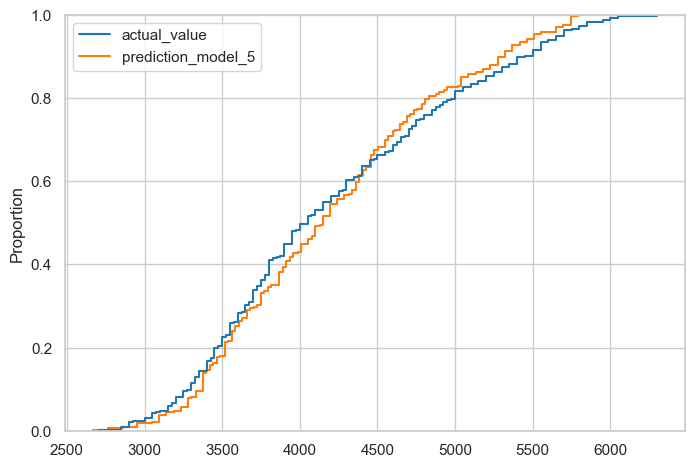

In [68]:
sns.ecdfplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_5'])
)

PDFs

<Axes: ylabel='Density'>

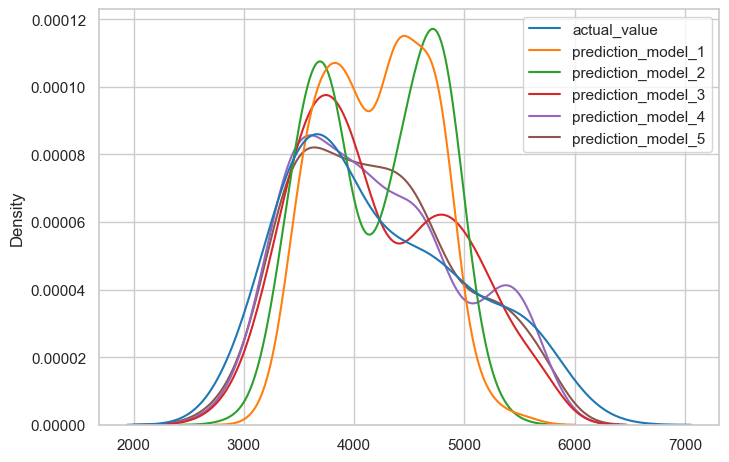

In [69]:
sns.kdeplot(
    data=models_results
)

¿Qué pudimos haber encontrado antes de hacer los modelos?

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


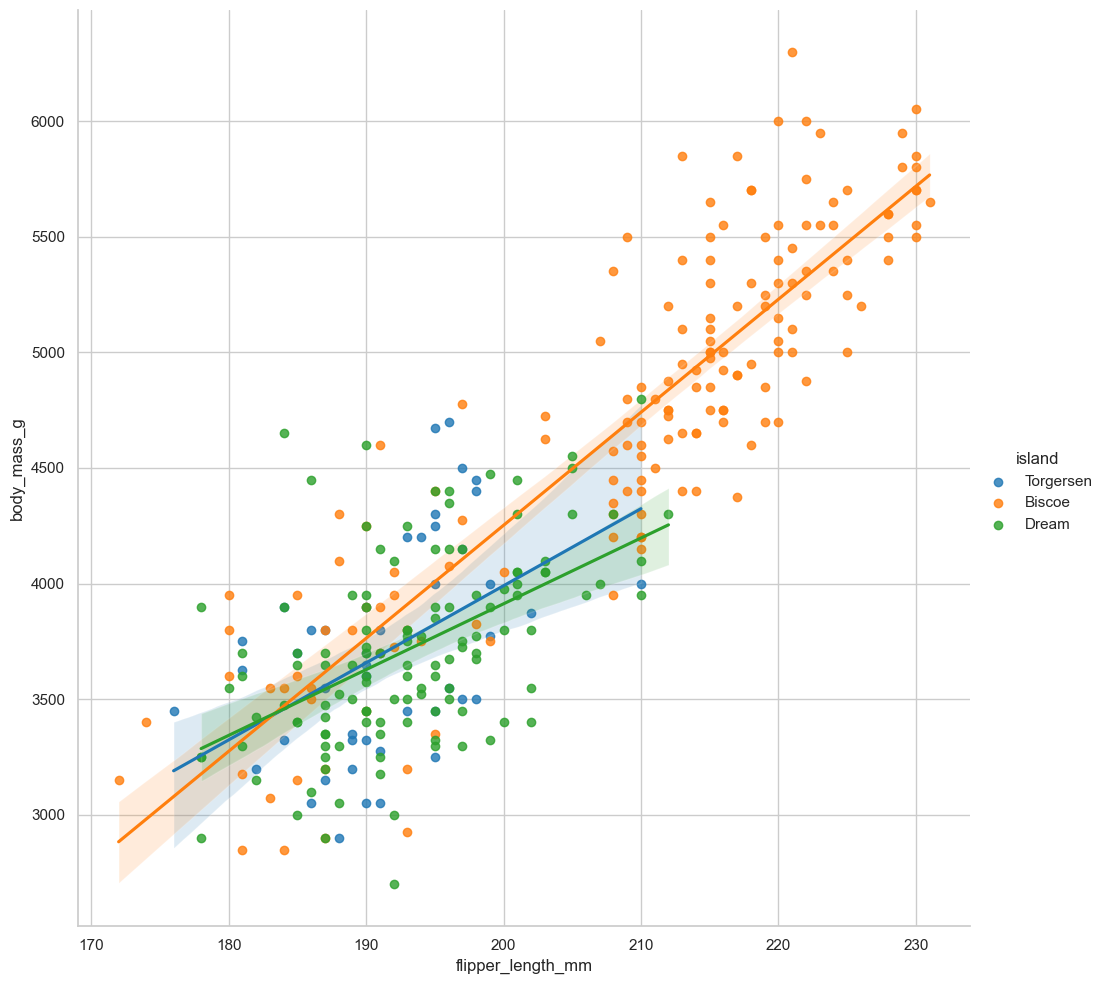

In [84]:
sns.lmplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue= 'island',
    height = 10
    
)

Análisis de Regresión Logística

In [71]:
smf.logit(
    data = processed_penguins_df,
    formula = 'numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)'
).fit().summary()



Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.4793
Time:                        18:06:11   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Exploración de nuestras variables categóricas

In [72]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a una determinada especie?

In [73]:
processed_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [74]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
)

processed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,1


In [75]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + C(sex)',
    data = processed_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [76]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_prediction

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [77]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name = 'count')
)

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


In [78]:
#Matriz de confusión
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)

# 151 pinguinos que eran machos y clasifiqué como macho
# 36 pinguinos que eran machos pero clasifiqué como hembra
# 17 pinguinos hembra que clasifiqué como macho
# 129 pinguinos hembra que clasifiqué como hembra

[[151  36]
 [ 17 129]]


0.8408408408408409

Paradoja de Simpson

d:\iVisa\Platzi\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


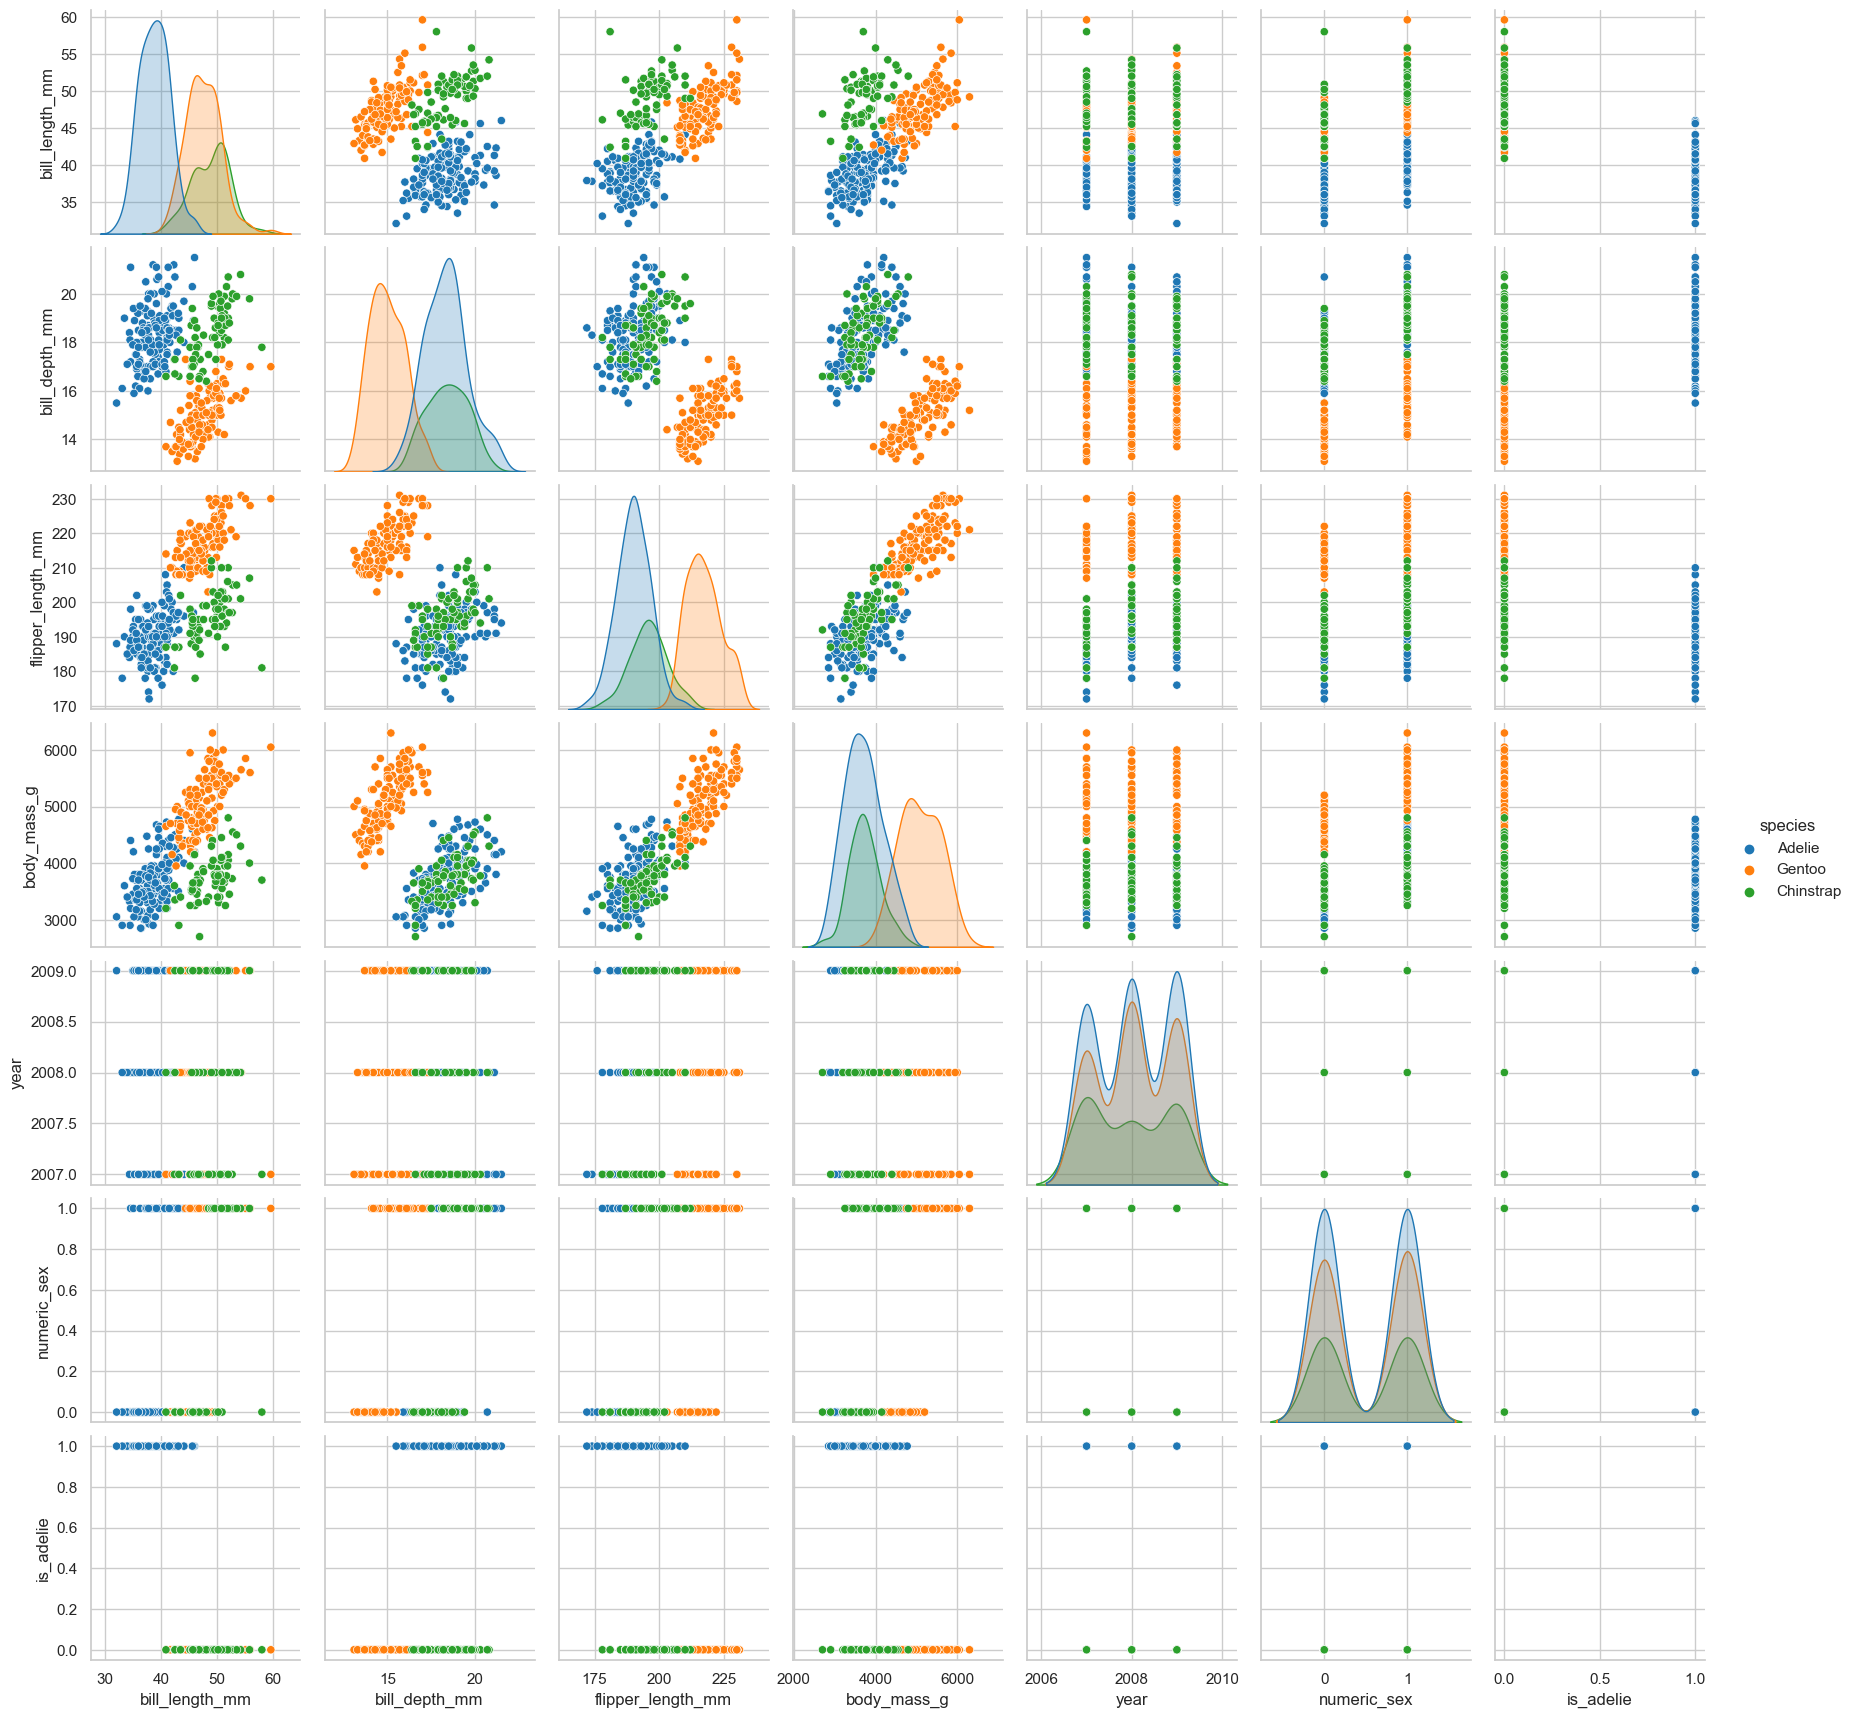

In [79]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species'
)